In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
df=pd.read_csv("C:\\Users\\vivsw\\Downloads\\disaster_tweets_data.csv",encoding='latin1')
print("Shape of the dataframe: ",df.shape)
df.isna().sum()
df.head()

Shape of the dataframe:  (7613, 2)


,tweets,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [3]:
def data_process(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [4]:
df.tweets=df['tweets'].apply(data_process)

In [5]:
df=df.drop_duplicates('tweets')

In [6]:
df.head()

,tweets,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [7]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [8]:
df['tweets'] = df['tweets'].apply(lambda x: stemming(x))

In [9]:
df.head()

,tweets,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


<Axes: xlabel='target', ylabel='count'>

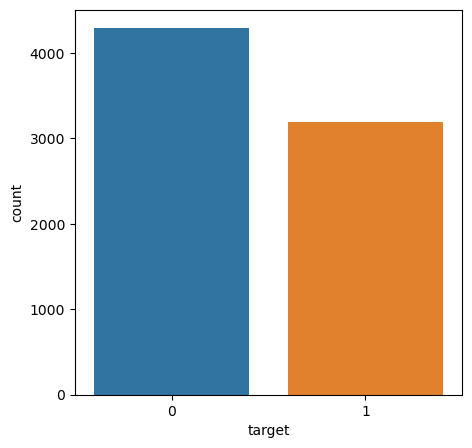

In [10]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='target', data = df)

In [11]:
df.dtypes

tweets    object
target     int64
dtype: object

In [12]:
pos_tweets = df[df.target == 1]
pos_tweets.head()

,tweets,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [13]:
neg_tweets = df[df.target == 0]
neg_tweets.head()

,tweets,target
15,whats man,0
16,love fruits,0
17,summer lovely,0
18,car fast,0
19,goooooooaaaaaal,0


In [14]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['tweets'])

In [15]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 74577

First 20 features:
 ['0011' '0011 utc' '001116' '001116 utc20150805' '0025' '0025 updated'
 '005225' '005225 utc20150805' '010156' '010156 okinawa' '010217'
 '010217 okinawa' '0104' '0104 utc' '0104 utc5km' '010401'
 '010401 utc20150805' '0106' '0106 bmw' '0111']


In [16]:
X = df['tweets']
Y = df['target']
X = vect.transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
def eval_model(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))
    
def mscore(model):
    print('Train Score', model.score(x_train,y_train))
    print('Test Score', model.score(x_test,y_test))

# Multinomial Naïve Bayes Classification

In [21]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [22]:
ypred_mnb=mnb.predict(x_test)
mnb_acc=accuracy_score(ypred_mnb,y_test)
accuracy={}
print("Accuracy of mnb is", mnb_acc)
accuracy['Multinomial Naïve Bayes']=mnb_acc

Accuracy of mnb is 0.788235294117647


In [23]:
mscore(mnb)
eval_model(ypred_mnb,y_test)

Train Score 0.9768270944741533
Test Score 0.788235294117647
[[892 223]
 [173 582]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1115
           1       0.72      0.77      0.75       755

    accuracy                           0.79      1870
   macro avg       0.78      0.79      0.78      1870
weighted avg       0.79      0.79      0.79      1870



# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()
m1.fit(x_train,y_train)

LogisticRegression()

In [25]:
ypred_m1=m1.predict(x_test)
m1_acc=accuracy_score(ypred_m1,y_test)
print("Accuracy of Logistic_Regression is", m1_acc)
accuracy['Logistic Regression']=m1_acc

Accuracy of Logistic_Regression is 0.7941176470588235


In [26]:
eval_model(y_test,ypred_m1)
mscore(m1)

[[967  98]
 [287 518]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1065
           1       0.84      0.64      0.73       805

    accuracy                           0.79      1870
   macro avg       0.81      0.78      0.78      1870
weighted avg       0.80      0.79      0.79      1870

Train Score 0.996078431372549
Test Score 0.7941176470588235


# KNN Classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier
m2=KNeighborsClassifier(n_neighbors=15)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [28]:
ypred_m2=m2.predict(x_test)
m2_acc=accuracy_score(ypred_m2,y_test)
print("Accuracy of knn is", m2_acc)
accuracy['KNN']=m2_acc

Accuracy of knn is 0.604812834224599


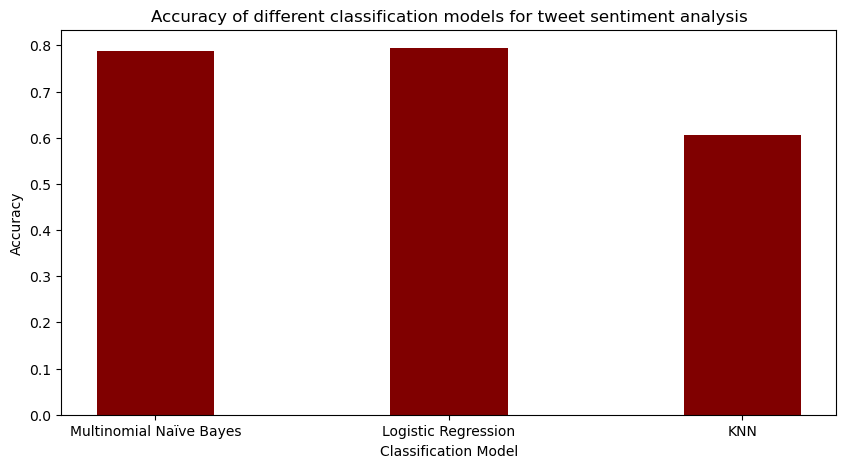

In [29]:
model = list(accuracy.keys())
acc = list(accuracy.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(model, acc, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classification Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of different classification models for tweet sentiment analysis")
plt.show()

In [30]:
print("Most accurate model for given data is", model[acc.index(max(acc))], "with accuracy =",max(acc))

Most accurate model for given data is Logistic Regression with accuracy = 0.7941176470588235


Made by Vivswaan Singh